#List of Schools in New Zealand

To know about the primary and secondary education, number of students enrolled and student enrolment based on origin and school details in New Zealand. The intention is to compare which region of NZ has a greater number of schools and number of students of each origin based on region. This means that we can compare the students count whether they are Maori, European, Asian or International students and reach to a conclusion that which students (Origin) acquiring education in NZ are more in number New Zealand schools’ enrolment, we accessed the data via a web API from data.govt.nz. This data source had an API setup. 

In [32]:
library(tidyverse)
library(httr)         #Package used for API interaction in R
library(ggplot2)      #For plotting 
library(visdat)       # to find the missing data


In [33]:
School_sample_api <- GET("https://catalogue.data.govt.nz/api/3/action/datastore_search?resource_id=bdfe0e4c-1554-4701-a8fe-ba1c8e0cc2ce&limit=2556") # A GET request is submitted within the URL


In [34]:
NZ_School_sample1 <- content(School_sample_api) #parse the content returned from the server as text using the content function

In [35]:
School_list = NZ_School_sample1$result$records # Taking the records and assigning it School_list

In [36]:
#Initialising
School_Id <- c()
Org_Name  <- c()
URL  <- c()
Urban_Area  <- c()
Org_Type  <- c()
Definition  <- c()
Authority  <- c()
CoEd_Status  <- c()
Regional_Council  <- c()
Territorial_Authority  <- c()
Local_Office_Name  <- c()
Education_Region  <- c()
General_Electorate  <- c()
Maori_Electorate  <- c()
Latitude  <- c()
Longitude  <- c()
Decile  <- c()
Total  <- c()
European  <- c()
Maori  <- c()
Pacific  <- c()
Asian  <- c()
MELAA  <- c()
Other  <- c()
International  <- c()

In [37]:
#Iteration of  Schoollist array to gather only the required values and handling the null values to make the column size same
for (i in 1:length(School_list))
{
  
  if (is.null(School_list[[i]]$School_Id)){School_Id[i] <- ""} else{School_Id[i] <- School_list[[i]]$School_Id}
  if (is.null(School_list[[i]]$Org_Name)){Org_Name[i] <- ""} else{Org_Name[i] <- School_list[[i]]$Org_Name}
  if (is.null(School_list[[i]]$URL)){URL[i] <- ""} else {URL[i] <- School_list[[i]]$URL}
  if (is.null(School_list[[i]]$Urban_Area)) {Urban_Area[i] <- ""} else{Urban_Area[i] <- School_list[[i]]$Urban_Area}
  if (is.null(School_list[[i]]$Org_Type )){Org_Type[i] <- ""} else{Org_Type[i] <- School_list[[i]]$Org_Type}
  if (is.null(School_list[[i]]$Definition)){Definition[i] <- ""} else{ Definition[i] <- School_list[[i]]$Definition}
  if (is.null(School_list[[i]]$Authority)){Authority[i] <- ""} else{Authority[i] <- School_list[[i]]$Authority}
  if (is.null(School_list[[i]]$CoEd_Status)) {CoEd_Status[i] <- ""} else{CoEd_Status[i] <- School_list[[i]]$CoEd_Status}
  #if (is.null(sam[[i]]$Regional_Council)) {Regional_Council[i] <-  "Not"} else{Regional_Council[i] <- sam[[i]]$Regional_Council}
  if(School_list[[i]]$Regional_Council=="") {Regional_Council[i] <-  "Data unknown"} else{Regional_Council[i] <- School_list[[i]]$Regional_Council}
  if (is.null(School_list[[i]]$Territorial_Authority)) {Territorial_Authority[i] <- ""} else {Territorial_Authority[i] <- School_list[[i]]$Territorial_Authority}
  if (is.null(School_list[[i]]$Local_Office_Name)){Local_Office_Name[i] <- ""}else {Local_Office_Name[i] <- School_list[[i]]$Local_Office_Name}
  if (is.null(School_list[[i]]$Education_Region)) {Education_Region[i] <- ""} else {Education_Region[i] <- School_list[[i]]$Education_Region}
  if (is.null(School_list[[i]]$General_Electorate)){General_Electorate[i] <-""}else{General_Electorate[i] <- School_list[[i]]$General_Electorate}
  if (is.null(School_list[[i]]$Maori_Electorate)){Maori_Electorate[i] <- ""} else{Maori_Electorate[i] <- School_list[[i]]$Maori_Electorate}
  if (is.null(School_list[[i]]$Latitude)) {Latitude[i] <- ""} else {Latitude[i] <- School_list[[i]]$Latitude}
  if (is.null(School_list[[i]]$Longitude)){Longitude[i] <-""} else{Longitude[i] <- School_list[[i]]$Longitude}
  if (is.null(School_list[[i]]$Decile)) {Decile[i] <- ""} else {Decile[i] <- School_list[[i]]$Decile}
  if (is.null(School_list[[i]]$Total)) {Total[i] <-""} else{Total[i] <- School_list[[i]]$Total}
  if (is.null(School_list[[i]]$European)) {European[i] <- ""} else{European[i] <- School_list[[i]]$European}
  if (is.null(School_list[[i]]$Maori)){Maori[i] <-""} else{Maori[i] <- School_list[[i]]$Maori}
  if (is.null(School_list[[i]]$Pacific)){Pacific[i] <- ""} else{Pacific[i] <- School_list[[i]]$Pacific}
  if (is.null(School_list[[i]]$Asian)) {Asian[i] <- ""} else{Asian[i] <- School_list[[i]]$Asian}
  if (is.null(School_list[[i]]$MELAA)) {MELAA[i] <- ""} else{MELAA[i] <- School_list[[i]]$MELAA}
  if (is.null(School_list[[i]]$Other)){Other[i] <- ""} else{Other[i] <- School_list[[i]]$Other}
  if (is.null(School_list[[i]]$International)){International[i] <-""} else{International[i] <- School_list[[i]]$International}
  
}

In [38]:
#Creating a dataframe with columns required
School_table <- tibble(School_Id = School_Id, Org_Name= Org_Name, Urban_Area = Urban_Area, Org_Type = Org_Type, Authority = Authority, CoEd_Status = CoEd_Status ,Regional_Council= Regional_Council ,Territorial_Authority = Territorial_Authority ,Local_Office_Name = Local_Office_Name, Education_Region = Education_Region, General_Electorate = General_Electorate, Maori_Electorate = Maori_Electorate, Latitude = Latitude, Longitude = Longitude,Decile = Decile,Total = Total,European = European,Maori= Maori,Pacific = Pacific, Asian = Asian,MELAA = MELAA, Other = Other,International = International)
School_table

School_Id,Org_Name,Urban_Area,Org_Type,Authority,CoEd_Status,Regional_Council,Territorial_Authority,Local_Office_Name,Education_Region,...,Longitude,Decile,Total,European,Maori,Pacific,Asian,MELAA,Other,International
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3957,Gorge Road School,Rural Area,Full Primary,State,Co-Educational,Southland Region,Southland District,Invercargill,Otago/Southland,...,168.700482,9,35,23,4,0,8,0,0,0
3975,Limehills School,Rural Area,Full Primary,State,Co-Educational,Southland Region,Southland District,Invercargill,Otago/Southland,...,168.328792,10,182,141,32,0,6,2,1,0
3977,Lochiel School,Rural Area,Full Primary,State,Co-Educational,Southland Region,Southland District,Invercargill,Otago/Southland,...,168.335167,10,96,81,10,0,5,0,0,0
3991,Myross Bush School,Rural Area,Contributing,State,Co-Educational,Southland Region,Invercargill City,Invercargill,Otago/Southland,...,168.417807,10,185,171,8,1,2,0,3,0
3943,Dipton School,Rural Area,Full Primary,State,Co-Educational,Southland Region,Southland District,Invercargill,Otago/Southland,...,168.351309,9,64,49,6,0,8,0,1,0
603,KingsGate School,Secondary Urban Area,Full Primary,State : Integrated,Co-Ed,Auckland Region,Auckland - Franklin,Auckland,Auckland,...,174.896802,5,105,51,16,28,4,5,1,0
3956,Gore Main School,Minor Urban Area,Contributing,State,Co-Educational,Southland Region,Gore District,Invercargill,Otago/Southland,...,168.940592,7,196,161,26,1,5,2,1,0
3954,Glenham School,Rural Area,Contributing,State,Co-Educational,Southland Region,Southland District,Invercargill,Otago/Southland,...,168.85016,8,9,8,1,0,0,0,0,0
3961,Halfmoon Bay School,Rural Area,Full Primary,State,Co-Educational,Southland Region,Southland District,Invercargill,Otago/Southland,...,168.12815,5,34,21,13,0,0,0,0,0


In [8]:

# to make the Latitude and Lonigtude vaues as Numeric 
School_table$Latitude <- as.numeric(School_table$Latitude)
School_table$Longitude <- as.numeric(School_table$Longitude)

In [46]:
# to make the Latitude and Lonigtude vaues as Numeric 
School_table$Latitude <- as.numeric(School_table$Latitude)
School_table$Longitude <- as.numeric(School_table$Longitude)

# to remove the null values in Latitude and longitude and taking values other than "Data unknown" from Regional_Council
School_list_drop_na_column <- School_table %>%
  drop_na(Latitude, Longitude) %>%
  filter(Regional_Council != "Data unknown")



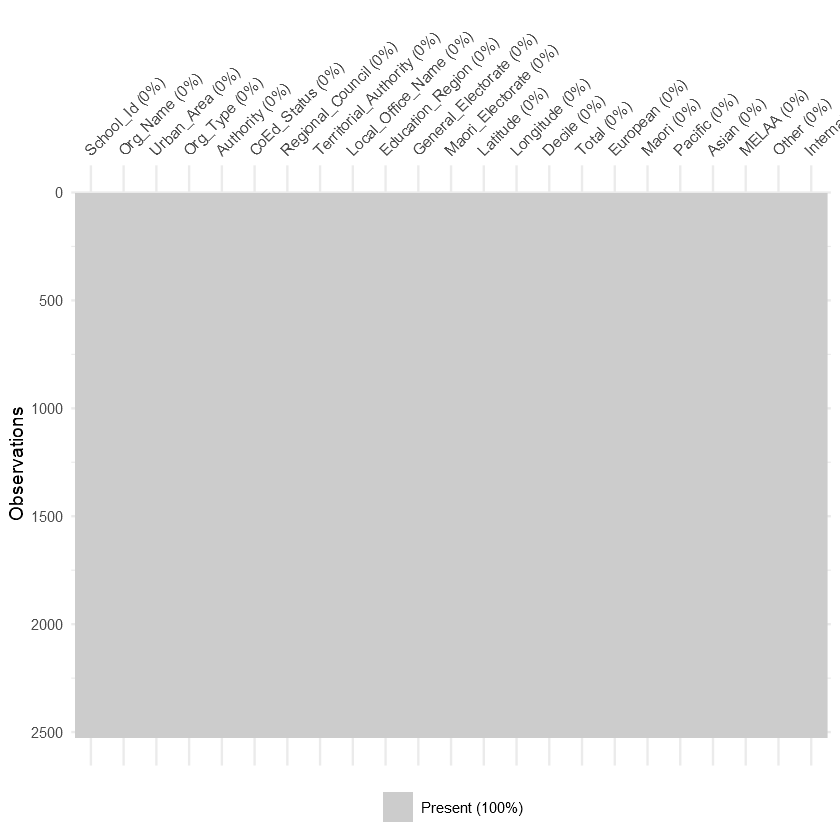

In [47]:
vis_miss(School_list_drop_na_column)

One of our requirements was to plot the top five regions which has a greater number of schools. We have used the group_by function to group the school list based on Regional_Council. We took the mean of Latitude and Longitude and count of schools in each region to form a table using summarise function.  The five points were plotted on NZ map using ggplot.

In [48]:
# to get the top 5 regions with highest school numbers by grouping based on region and taking the mean of Latitude and Longitude
table3<- School_list_drop_na_column %>%
  group_by(Regional_Council) %>%
  summarise(school_count = n(), Latitude =mean(Latitude), Longitude= mean(Longitude)) %>%
  arrange(desc(school_count)) %>%
  top_n(5, school_count)
table3

Regional_Council,school_count,Latitude,Longitude
<chr>,<int>,<dbl>,<dbl>
Auckland Region,550,-36.88500,174.7835
Waikato Region,309,-37.80613,175.4388
Canterbury Region,291,-43.63906,172.2818
Wellington Region,247,-41.15553,174.9921
Manawatu-Wanganui Region,197,-40.06906,175.4507


In [49]:
#devtools::install_github("dkahle/ggmap")
# To plot the New Zealand map
library(ggmap) # ggmap is used for  the spatial visualisation and extracts the longitude nad latitude from the Google maps

In [57]:

###
#register_google(key = "Provide you API key",write = TRUE) # this fucntion tells ggmap about the key. API key is a unique key used to authenticate the requests associated.

has_google_key()


[1] TRUE

Source : https://maps.googleapis.com/maps/api/staticmap?center=New%20Zealand&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=New+Zealand&key=xxx


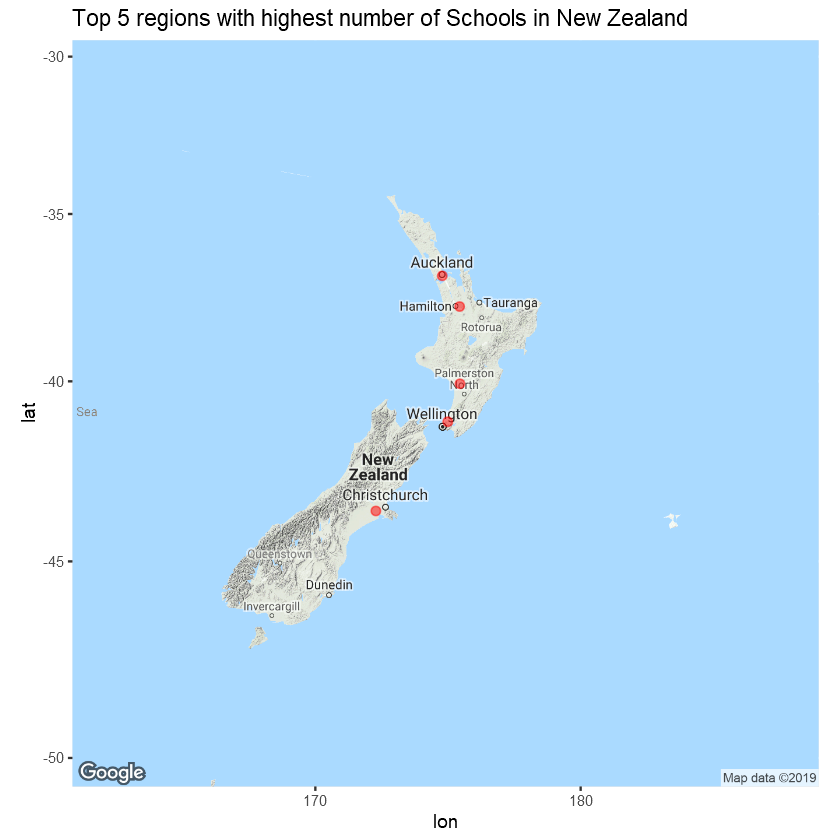

In [51]:
# to plot the New Zealand MAp and to plot the points on the Map.

NZ_map <- get_map("New Zealand", zoom = 5)  #‘get_map’ queries Google maps server for the map of New Zealand using personal API key
NZ_Points <- ggmap(NZ_map) + geom_point(aes(x = Longitude, y = Latitude),col = "red", data = table3, alpha = .5, size= 2)+labs(title ="Top 5 regions with highest number of Schools in New Zealand")

NZ_Points # to plot the points on map

It is clear from the table and graph that Auckland has a greater number of school when compared to other regions which tells that Auckland provides better education opportunity to students.

	Second requirement was to create a table with the counts of International Students, Maori Students, Asian student, European students and Total Students in each region of New Zealand and use the mutate function to find the proportion of these students from the total number of students. The proportion of these different students based on origin in each region was plotted using the barplot to find which type of students are more in each region of New Zealand.

In [52]:
table4 <- School_list_drop_na_column %>%
  group_by(Regional_Council) %>%
  summarise(International_students_count = sum(International), Maori_students_count = sum(Maori),European_students_count= sum(European),Asian_students_count= sum(Asian),Total_Students = sum(Total))%>%
  arrange(desc(International_students_count, Maori_students_count, Total_Students)) %>%
  mutate(Proportion_International =(International_students_count/Total_Students), Proportion_Maori = (Maori_students_count/Total_Students)) %>%
  mutate(Proportion_European= (European_students_count/Total_Students),Proportion_Asian = (Asian_students_count/Total_Students))

table4

Regional_Council,International_students_count,Maori_students_count,European_students_count,Asian_students_count,Total_Students,Proportion_International,Proportion_Maori,Proportion_European,Proportion_Asian
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Auckland Region,7661,42253,98872,66917,283082,0.0270628299,0.1492606,0.3492698,0.23638734
Canterbury Region,1389,13409,65499,10938,98467,0.0141062488,0.1361776,0.6651873,0.11108290
Wellington Region,1015,17000,44426,10358,83828,0.0121081262,0.2027962,0.5299661,0.12356253
Bay of Plenty Region,836,22856,25620,3635,56069,0.0149101999,0.4076406,0.4569370,0.06483083
Waikato Region,776,27851,40902,7215,82622,0.0093921716,0.3370894,0.4950497,0.08732541
Otago Region,517,4479,24108,2034,33691,0.0153453445,0.1329435,0.7155620,0.06037221
Manawatu-Wanganui Region,501,13729,21561,2591,41386,0.0121055429,0.3317305,0.5209733,0.06260571
Hawke's Bay Region,244,11986,15290,1409,31000,0.0078709677,0.3866452,0.4932258,0.04545161
Nelson Region,233,1348,6047,794,8944,0.0260509839,0.1507156,0.6760957,0.08877460


In [54]:
Block_name <-c("Proportion_International","Proportion_Asian","Proportion_Maori","Proportion_European")
colors <- c("blue", "green", "yellow", "red")

In [55]:
count <-c(table4$Proportion_International,table4$Proportion_Asian, table4$Proportion_Maori,table4$Proportion_European)
Values <- matrix(count, nrow = 4, ncol = 17, byrow = TRUE) # to make as a matrix


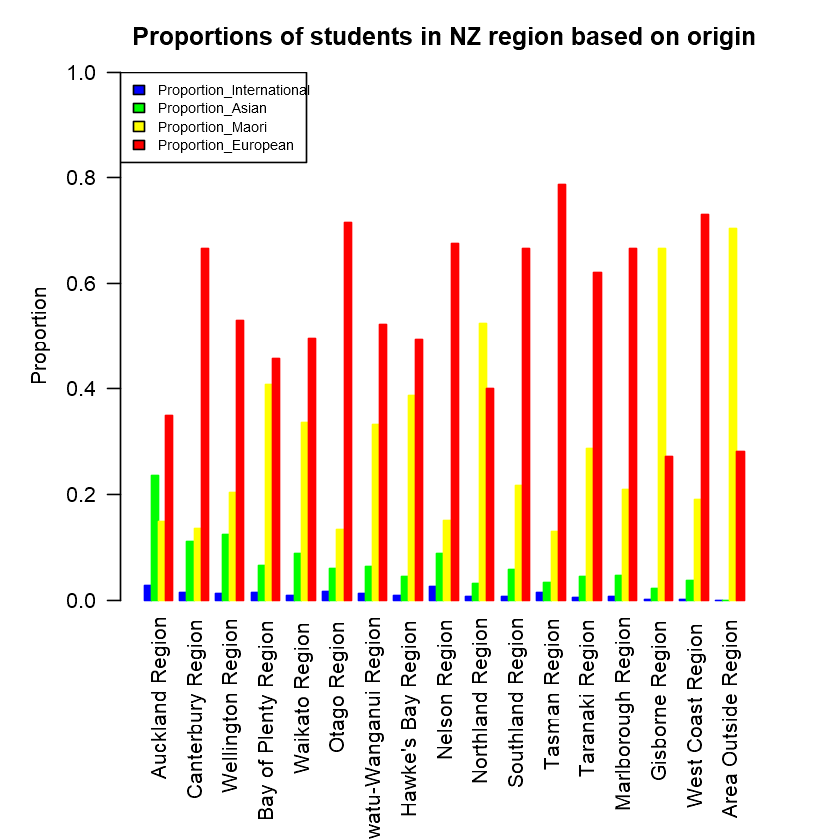

In [56]:

par(mar = c(9, 4, 2, 2) + 1) #add room for  labels

barplot(Values ,names.arg=table4$Regional_Council,col= colors,ylim = c(0,1),ylab = "Proportion", main ="Proportions of students in NZ region based on origin",border= c("blue", "green", "yellow", "red"),las = 2, beside =TRUE) ###las for space for label
legend("topleft", Block_name, cex = .7, fill = colors)

From the graph it is clear that European student have a greater proportion when compared to the others in most of the regions.

Reference:

https://www.rdocumentation.org/packages/ggmap/versions/3.0.0/topics/get_map
